## A simple Bayesian linear regression model with normal priors on the parameters

### Data Generation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
np.random.seed(50)
#true parameters value
alpha,sigma=1,1
beta=[1,2.5]
# dataset size
size=100
# features/predictor variable
x1=np.linspace(0,1,size)
x2=np.linspace(0,0.2,size)
# generating outcome variable
y=alpha+beta[0]*x1+beta[1]*x2+np.random.randn(size)*sigma


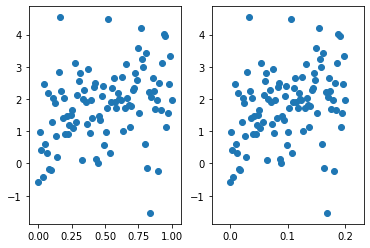

In [24]:
plt.subplot(1,2,1)
plt.scatter(x1,y)
plt.subplot(1,2,2)
plt.scatter(x2,y)

### Model Selection

In [25]:
from pymc3 import Model, Normal, HalfNormal
basic_model=Model()
with basic_model:
    # priors initializations of the unknown parameters
    alpha =Normal('alpha', mu=0, sd=10)
    beta =Normal('beta', mu=0, sd=10, shape=2)
    sigma =HalfNormal('sigma', sd=1)
    #expected value of outcome
    mu =alpha +beta[0]*x1 +beta[1]*x2
    #likelihood of obsevations
    Y_obs =Normal('Y_obs', mu=mu, sd=sigma, observed=y)   

In [26]:
from pymc3 import find_MAP
map_estimate =find_MAP(model=basic_model)
print(map_estimate)

C:\Users\35841\Anaconda3\envs\mllearn\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -159.77, ||grad|| = 4.6271: 100%|█████████████████████████████████████████████| 18/18 [00:00<00:00, 2100.71it/s]


{'alpha': array(1.16815802), 'beta': array([1.19567205, 0.23913441]), 'sigma_log__': array(0.06543749), 'sigma': array(1.067626)}
